In [1]:
import json
import matplotlib.pyplot as plt

def plot_cdf(f):
    with open("results/" + f, "r") as r:
        d = json.loads(r.read())
    x = sorted(d['time_taken'].values())
    y = [float(i) / len(x) for i in range(1, len(x)+1)]
    plt.title(f)
    plt.plot(x, y)
    plt.show()

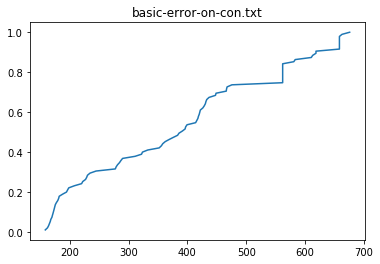

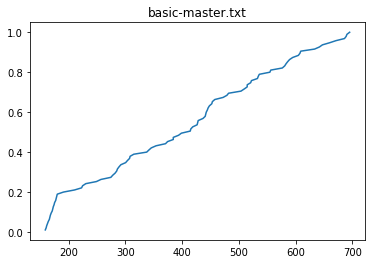

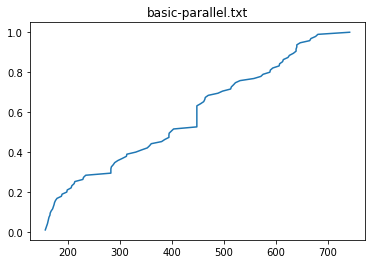

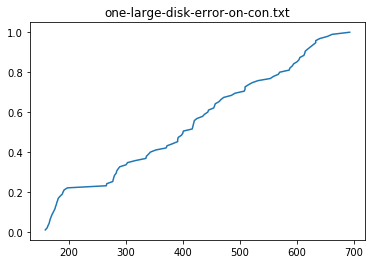

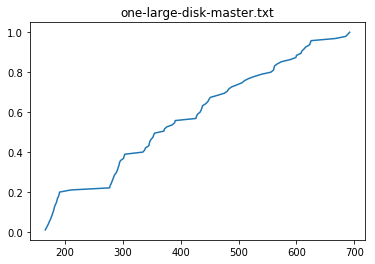

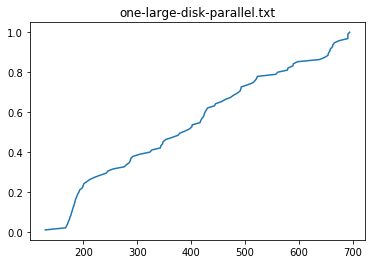

In [3]:
from os import listdir
from os.path import isfile, join
onlyfiles = sorted([f for f in listdir("results") if isfile(join("results", f))])
for f in onlyfiles:
    plot_cdf(f)

In [76]:
import json
import subprocess
import pandas as pd
out = json.loads(subprocess.check_output(['kubectl', 'get', 'events', '-o', 'json'], env={
    'KUBECONFIG': '/tmp/tmpflzjn152/config',
}))['items']
for x in out:
    for y in ['host', 'component']:
        if y in x['source']:
            x['source'] = x['source'][y]
    x['involvedObject'] = x['involvedObject']['name']
    if x['reason'] == 'FailedAttachVolume':
         x['message'] = x['message'].split(" : ")[1]
out_df = pd.DataFrame(out)
out_df = out_df.drop(['apiVersion', 'eventTime', 'kind', 'metadata', 'reportingComponent', 'reportingInstance'], axis=1)

{u'count': 1, u'eventTime': None, u'reportingInstance': u'', u'firstTimestamp': u'2019-06-20T23:05:18Z', u'kind': u'Event', u'apiVersion': u'v1', u'lastTimestamp': u'2019-06-20T23:05:18Z', u'source': u'pd.csi.storage.gke.io_csi-gce-pd-controller-0_d9896321-93af-11e9-a5a2-064beefb3dc3', u'reason': u'Provisioning', u'reportingComponent': u'', u'involvedObject': u'pvc94', u'message': u'External provisioner is provisioning volume for claim "default/pvc94"', u'type': u'Normal', u'metadata': {u'uid': u'ff8f9407-93af-11e9-82e0-42010a800019', u'namespace': u'default', u'resourceVersion': u'731', u'creationTimestamp': u'2019-06-20T23:06:12Z', u'selfLink': u'/api/v1/namespaces/default/events/pvc94.15aa0aa37ff7429b', u'name': u'pvc94.15aa0aa37ff7429b'}}


In [87]:
out_df.sort_values(by='lastTimestamp')
print(out_df['reason'].unique())
sucess_attach = out_df[out_df['reason'] == 'SuccessfulAttachVolume']
fail_mount = out_df[out_df['reason'] == 'FailedMount']
fail_attach = out_df[out_df['reason'] == 'FailedAttachVolume']
started = out_df[out_df['reason'] == 'Started']

started

[u'Scheduled' u'Pulling' u'Pulled' u'Created' u'Started'
 u'SuccessfulCreate' u'Starting' u'NodeHasSufficientMemory'
 u'NodeHasNoDiskPressure' u'NodeHasSufficientPID'
 u'NodeAllocatableEnforced' u'NodeReady' u'RegisteredNode'
 u'CorruptDockerOverlay2' u'FrequentKubeletRestart' u'UnregisterNetDevice'
 u'FrequentDockerRestart' u'FrequentContainerdRestart'
 u'FailedAttachVolume' u'FailedMount' u'SuccessfulAttachVolume'
 u'ExternalProvisioning' u'Provisioning' u'ProvisioningFailed']


,count,firstTimestamp,involvedObject,lastTimestamp,message,reason,source,type
4,1,2019-06-20T23:05:00Z,csi-gce-pd-controller-0,2019-06-20T23:05:00Z,Started container csi-snapshotter,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal
8,1,2019-06-20T23:05:06Z,csi-gce-pd-controller-0,2019-06-20T23:05:06Z,Started container csi-provisioner,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal
12,1,2019-06-20T23:05:07Z,csi-gce-pd-controller-0,2019-06-20T23:05:07Z,Started container csi-attacher,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal
16,1,2019-06-20T23:05:08Z,csi-gce-pd-controller-0,2019-06-20T23:05:08Z,Started container gce-pd-driver,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal
22,1,2019-06-20T23:04:58Z,csi-gce-pd-node-m8bnh,2019-06-20T23:04:58Z,Started container csi-driver-registrar,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal
26,1,2019-06-20T23:05:03Z,csi-gce-pd-node-m8bnh,2019-06-20T23:05:03Z,Started container gce-pd-driver,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal
75,1,2019-06-20T23:11:52Z,pod12,2019-06-20T23:11:52Z,Started container main,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal
86,1,2019-06-20T23:12:45Z,pod13,2019-06-20T23:12:45Z,Started container main,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal
101,1,2019-06-20T23:11:08Z,pod15,2019-06-20T23:11:08Z,Started container main,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal
128,1,2019-06-20T23:12:44Z,pod19,2019-06-20T23:12:44Z,Started container main,Started,gke-test-cluster-f85c-default-pool-01a12a81-27lh,Normal


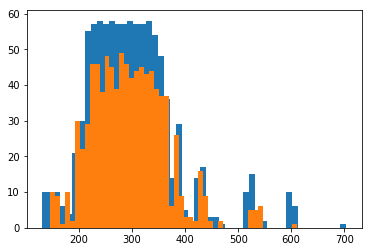

In [17]:
import re
from datetime import datetime

epoch = datetime.strptime("00:00:00.000000", "%H:%M:%S.%f")

class LogEntry:
    
    def __init__(self, t, source, msg):
        self.time = (datetime.strptime(t, "%H:%M:%S.%f") - epoch).total_seconds()
        self.source = source
        self.msg = msg
        self.next = None
        self.prev = None
        
    def match(self, prog):
        return prog.match(self.msg) is not None

with open('controller_logs.txt') as f:
    driver_logs = f.read().split("\n")

log_entries = []
log_reg = r"^[A-Z]0621 (\d{2}:){2}\d{2}.\d{6}       \d [a-z0-9\.\:\-\_]+\].+$"
prog = re.compile(log_reg)
for le in driver_logs:
    if prog.match(le) is None:
        continue
    time = le.split('       ')[0].split()[1]
    source = le.split('       ')[1].split()[1][:-1]
    msg = le.split('] ')[1]
    log_entries.append(LogEntry(time, source, msg))

request_prog = re.compile(r"^ControllerPublishVolume called with request")
grpc_prog = re.compile(r"^GRPC error:")
publish_requests = [le for le in log_entries if le.match(request_prog)]
grpc_errors = [le for le in log_entries if le.match(grpc_prog)]

min_time = min([le.time for le in log_entries])

plt.hist([le.time - min_time for le in publish_requests], bins=50)
plt.hist([le.time - min_time for le in grpc_errors], bins=50)
plt.show()